In [1]:
# 1. common to Lambda
from mxnet.image import imdecode
from gluoncv import model_zoo, data, utils
from io import BytesIO
import boto3

In [2]:
# 2. commont o Lambda
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)
s3_client = boto3.resource('s3')

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/mxnet/gluon/block.py:1389: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [3]:
with open("front_stairs.jpg", 'rb') as fp:
     str_image = fp.read()

img = imdecode(str_image)

s3.Object(bucket_name='dl-lambda-image-outgoing', key='front_stairs.jpg')

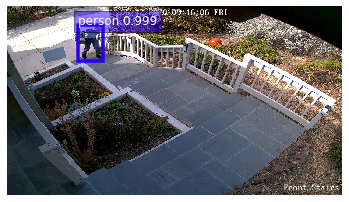

In [4]:
# 3. common to Lambda
x, img = data.transforms.presets.ssd.transform_test([img], short=512)
class_IDs, scores, bounding_boxes = net(x)
output = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0], class_IDs[0], class_names=net.classes)
output.axis('off')
f = BytesIO()
output.figure.savefig(f, format='jpeg', bbox_inches='tight')
s3_client.Bucket('dl-lambda-image-outgoing').put_object(Key='front_stairs.jpg', Body=f.getvalue())